 # USED CAR PRICE PREDICTION-
 # A]Provide the best performing model to determine the price of the used car
 # B]Providing the most important features which determine the price 

 ## Tasks to be completed 
        ### 1.import libraries and load dataset
        ### 2.Exploratory Data Analysis:-
                                a)Univariate Analysis to understand the distribution of features.
                                b)Multivariate analysis to determine correlations.
        ### 3.Layout regression experiment space.
        ### 4.Publish the performance of all the models on the same hold-out/ test dataset.
        ### 5.List out the most important features determining the price of used cars.


In [1]:
### STEP-1 importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### STEP-2 READ THE DATA FROM DATASET
carDF=pd.read_csv("cars1.csv")


In [3]:
### STEP-3: Explore data
print(carDF.shape)
print(carDF.info())
carDF.head(5)
#carDF.describe()


(1725, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1725 non-null   int64 
 1   year                     1725 non-null   int64 
 2   brand                    1725 non-null   object
 3   full_model_name          1725 non-null   object
 4   model_name               1725 non-null   object
 5   distance_travelled(kms)  1725 non-null   int64 
 6   fuel_type                1725 non-null   object
 7   city                     1725 non-null   object
 8   brand_rank               1725 non-null   int64 
 9   car_age                  1725 non-null   int64 
 10  price                    1725 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 148.4+ KB
None


,Id,year,brand,full_model_name,model_name,distance_travelled(kms),fuel_type,city,brand_rank,car_age,price
0,0,2016,Honda,Honda Brio S MT,Brio,9680,Petrol,Mumbai,7,5,425000
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,119120,Diesel,Mumbai,11,9,325000
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,64593,Diesel,Thane,1,4,2650000
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,25000,Diesel,Mumbai,2,4,4195000
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,23800,Diesel,Mumbai,14,9,475000


In [4]:
### STEP-4 Clean/Prepare the data
carDF.isnull().sum() # (Check for null columns)
carDF.isna().duplicated
car_df=carDF.drop('Id',axis=1)
car_df.head(5)

,year,brand,full_model_name,model_name,distance_travelled(kms),fuel_type,city,brand_rank,car_age,price
0,2016,Honda,Honda Brio S MT,Brio,9680,Petrol,Mumbai,7,5,425000
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,119120,Diesel,Mumbai,11,9,325000
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,64593,Diesel,Thane,1,4,2650000
3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,25000,Diesel,Mumbai,2,4,4195000
4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,23800,Diesel,Mumbai,14,9,475000


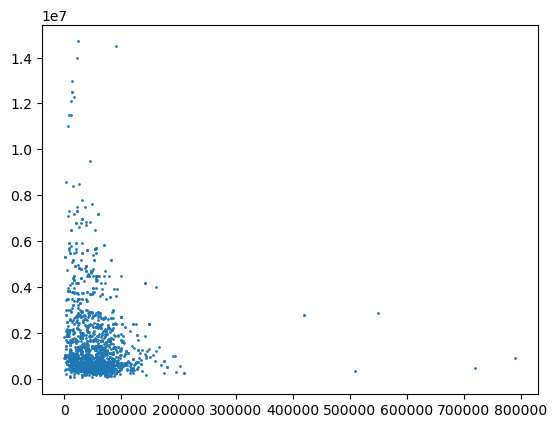

In [5]:
### STEP-5 :Visualize the data
plt.scatter(car_df['distance_travelled(kms)'],car_df['price'],s=1)

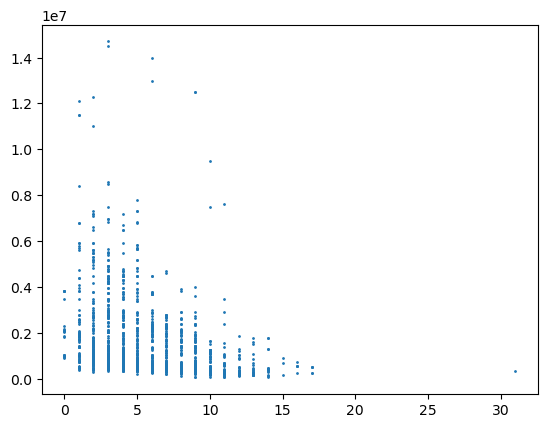

In [6]:
plt.scatter(car_df['car_age'],car_df['price'],s=1)

In [7]:
### STEP-6 Standardise the data 
### Label Encoding -NA in this case as this is linear and not catogorical data'

In [8]:
### STEP-7:Separate Features & Target

X=car_df[['distance_travelled(kms)','brand_rank','car_age']].values
y=car_df['price'].values


In [9]:
### SREP-8 train-test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=10)

In [10]:
### STEP-9 Fiting the Model
from sklearn.linear_model import LinearRegression
carPriceModel= LinearRegression()
carPriceModel.fit(X_train,y_train)


LinearRegression()

In [11]:
### STEP-10: Predict the test value based on the fited Model
y_pred_linear = carPriceModel.predict(X_test)

In [12]:
###  STEP-11:Evaluate the Model
from sklearn.metrics import r2_score
print(" R² Score using only 3 columns:")
print(r2_score(y_test,y_pred_linear))

## O/P r2score-0.13


 R² Score using only 3 columns:
0.1290157913649369


In [13]:
## STEP-12 Performance Enhacment
## Model Performance Boosting using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
carPriceModel_rf=RandomForestRegressor(random_state=10)


carPriceModel_rf.fit(X_train,y_train)
y_pred_rf=carPriceModel_rf.predict(X_test)
print("Best R² Score using random Forest Regressor:")
print(r2_score(y_test,y_pred_rf))

## O/P r2score-0.53






Best R² Score using random Forest Regressor:
0.5300931632466155


In [14]:
## Lets Add one more feature ''Fuel_type to further boost model performence
from sklearn.preprocessing import LabelEncoder
ftEncoder=LabelEncoder()
#Encoding for transforming categorical data to Numerical data
car_df['encodedFuelType']= ftEncoder.fit_transform(car_df['fuel_type'])
car_df['encodedFuelType'].value_counts()

#STEP-7:Separate Features & Target
X=car_df[['distance_travelled(kms)','brand_rank','car_age','encodedFuelType']].values
y=car_df['price'].values

#STEP-8:Train Test data Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10)

#SPET-9:fitting the data in model
from sklearn.linear_model import LinearRegression
oldCarPrzModel=LinearRegression()
oldCarPrzModel.fit(X_train,y_train)

#Step-10: Predicting the model outcome
y_pred_cp=oldCarPrzModel.predict(X_test)

#Evaluate the model
print("R² Score  after label encoding:")
print(r2_score(y_test,y_pred_cp))


R² Score  after label encoding:
0.19230771147567172


In [15]:
## STEP-12 Performance Enhacment
## Model Performance Boosting using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
carPriceModel_rf=RandomForestRegressor(random_state=6)

carPriceModel_rf.fit(X_train,y_train)
y_pred_rf=carPriceModel_rf.predict(X_test)
print("Best R² Score using RandomForestRegressor after label encoding:")
print(r2_score(y_test,y_pred_rf))

Best R² Score using RandomForestRegressor after label encoding:
0.5283357998641509


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Define the model
rf_model = RandomForestRegressor(random_state=10)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
best_r2 = r2_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best R² Score using Grid Search: {best_r2}")



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score using Grid Search: {best_r2}
